In [199]:
import pandas
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennysu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jennysu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jennysu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jennysu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [200]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sentences = pandas.read_csv('nlp-dataset.csv')['text']
corpus = []

for sentence in sentences:
    sentence = sentence.lower()
    words = word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    sentence = ' '.join(words)
    corpus.append(sentence)

In [201]:
#TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(norm='l2')

tfidf = v.fit_transform(corpus)

print('A list of features')
print('======================')
print(v.get_feature_names())

print("Tf-idf weighted document-term matrix:")
print("=========================")
dp = pandas.DataFrame(tfidf.toarray(), columns=v.get_feature_names())
pandas.DataFrame(tfidf.toarray(), columns=v.get_feature_names())

A list of features
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']
Tf-idf weighted document-term matrix:


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0.00000,0.000000,0.00000,0.000000,0.441993,0.452889,0.000000,0.000000,0.000000,0.000000,0.362440,0.305997,0.000000,0.000000,0.000000,0.000000,0.611994,0.00000
1,0.00000,0.000000,0.00000,0.439389,0.000000,0.225111,0.000000,0.000000,0.439389,0.000000,0.000000,0.608389,0.000000,0.000000,0.439389,0.000000,0.000000,0.00000
2,0.00000,0.618987,0.00000,0.000000,0.000000,0.229032,0.000000,0.000000,0.000000,0.000000,0.366582,0.309494,0.366582,0.000000,0.000000,0.447043,0.000000,0.00000
3,0.00000,0.623322,0.00000,0.000000,0.000000,0.000000,0.000000,0.369149,0.000000,0.369149,0.000000,0.000000,0.369149,0.450174,0.000000,0.000000,0.000000,0.00000
4,0.00000,0.328320,0.00000,0.000000,0.000000,0.485929,0.474237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.656641,0.00000
5,0.37519,0.000000,0.37519,0.000000,0.000000,0.192220,0.000000,0.307662,0.000000,0.615323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259749,0.37519


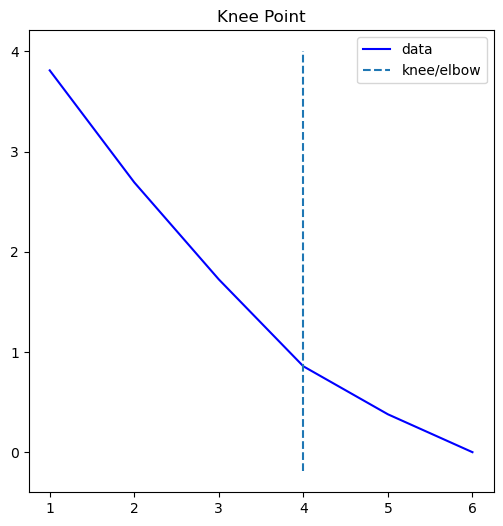

In [202]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

sse = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(dp)
    sse.append(kmeans.inertia_)

k1 = KneeLocator(range(1,7), sse, curve='convex', direction='decreasing', S=0.0)
k1.plot_knee()

[2 1 2 0 2 3 3 2 0 2 1 0 1 1 0 1 3 2]
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Cluster 1
['fan', 'music', 'polit', 'sam']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


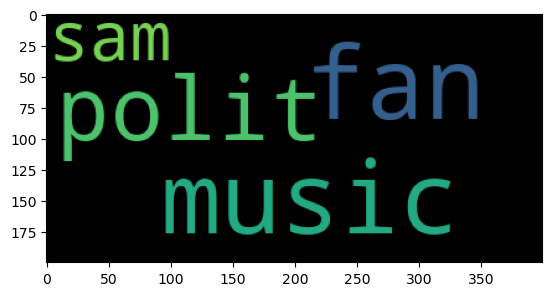


Cluster 2
['book', 'past', 'read', 'robert', 'sara']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


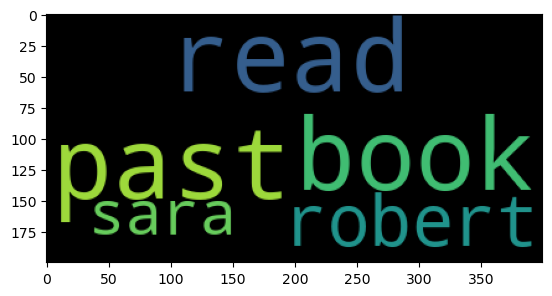


Cluster 3
['alison', 'current', 'john', 'love', 'natur', 'use']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


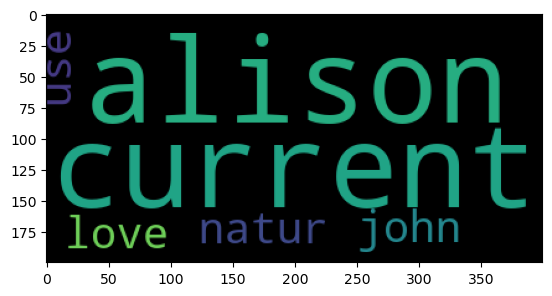


Cluster 4
['like', 'linda', 'sport']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


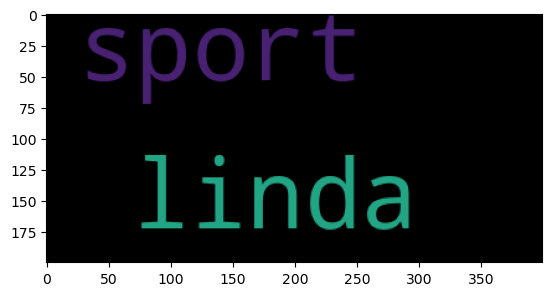

In [203]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dp_t = dp.transpose()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dp_t)
cluster_labels = kmeans.predict(dp_t)
wc = WordCloud()

print(cluster_labels)
print(dp.columns.tolist())

for cluster in range(4):
    print("\nCluster " + str(cluster + 1))
    words=[]
    for i in range(len(cluster_labels)):
        if (cluster_labels[i] == cluster):
            words.append(v.get_feature_names()[i])
    print (words)
    wc.generate(' '.join(words))
    plt.imshow(wc)
    plt.show()

In [204]:
#TF

v = TfidfVectorizer(use_idf=False, norm='l1')
tf = v.fit_transform(corpus)

print('A list of features')
print('======================')
print(v.get_feature_names())

print("Tf-weighted document-term matrix:")
print("=========================")
dp = pandas.DataFrame(tf.toarray(), columns=v.get_feature_names())
pandas.DataFrame(tf.toarray(), columns=v.get_feature_names())

A list of features
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']
Tf-weighted document-term matrix:


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0.000,0.000000,0.000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,0.000
1,0.000,0.000000,0.000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.333333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000
2,0.000,0.285714,0.000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,0.000000,0.000000,0.142857,0.000000,0.000
3,0.000,0.333333,0.000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000
4,0.000,0.166667,0.000,0.000000,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000
5,0.125,0.000000,0.125,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125


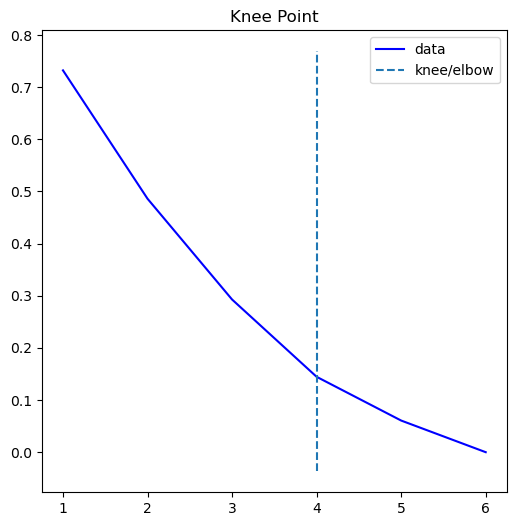

In [205]:
sse = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(dp)
    sse.append(kmeans.inertia_)

k1 = KneeLocator(range(1,7), sse, curve='convex', direction='decreasing', S=0.0)
k1.plot_knee()

[1 0 1 2 1 3 1 1 2 1 1 2 1 1 2 1 3 1]
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Cluster 1
['book']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


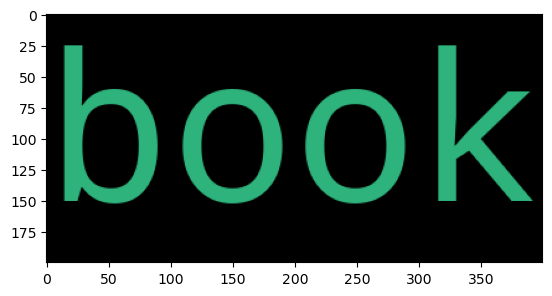


Cluster 2
['alison', 'current', 'john', 'linda', 'love', 'natur', 'past', 'read', 'robert', 'sara', 'use']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


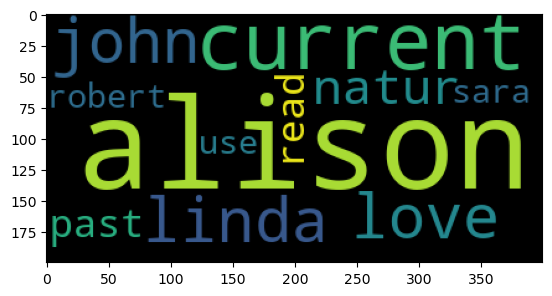


Cluster 3
['fan', 'music', 'polit', 'sam']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


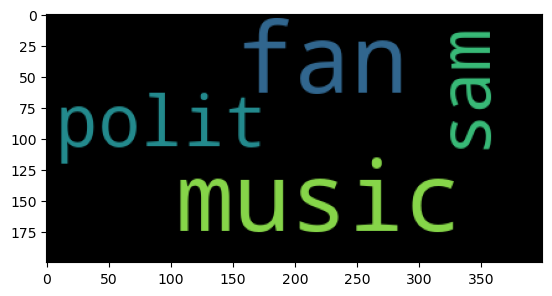


Cluster 4
['like', 'sport']


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


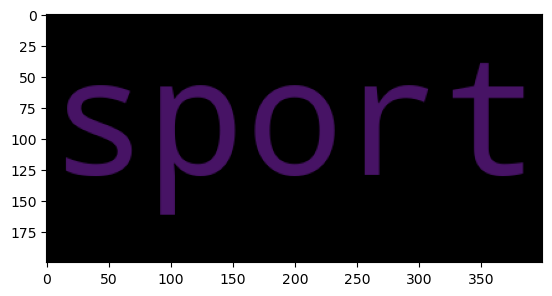

In [206]:
dp_t = dp.transpose()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dp_t)
cluster_labels = kmeans.predict(dp_t)
wc = WordCloud()

print(cluster_labels)
print(dp.columns.tolist())

for cluster in range(4):
    print("\nCluster " + str(cluster + 1))
    words=[]
    for i in range(len(cluster_labels)):
        if (cluster_labels[i] == cluster):
            words.append(v.get_feature_names()[i])
    print(words)
    wc.generate(' '.join(words))
    plt.imshow(wc)
    plt.show()

In [207]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(corpus)

print('A list of features')
print('======================')
print(count_vect.get_feature_names())

print("Bow document-term matrix:")
print("=========================")
dp  = pandas.DataFrame(bow.toarray(), columns=count_vect.get_feature_names())
pandas.DataFrame(bow.toarray(), columns=count_vect.get_feature_names())

A list of features
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']
Bow document-term matrix:


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0,0,0,0,1,2,0,0,0,0,1,1,0,0,0,0,2,0
1,0,0,0,1,0,1,0,0,1,0,0,2,0,0,1,0,0,0
2,0,2,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0
3,0,2,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2,0
5,1,0,1,0,0,1,0,1,0,2,0,0,0,0,0,0,1,1


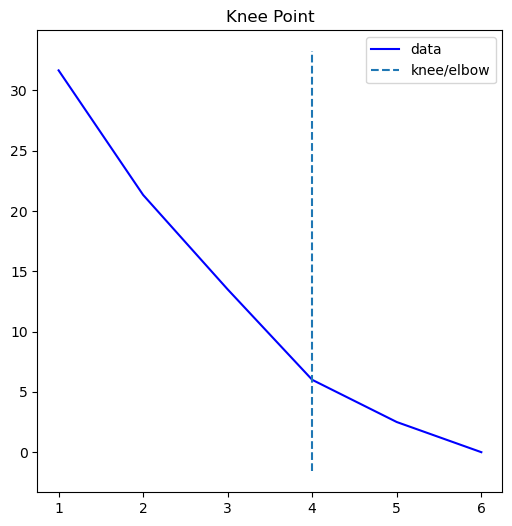

In [208]:
sse = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(dp)
    sse.append(kmeans.inertia_)

k1 = KneeLocator(range(1,7), sse, curve='convex', direction='decreasing', S=0.0)
k1.plot_knee()

[1 3 1 0 0 2 0 1 0 1 0 0 0 0 0 0 2 1]
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Cluster 1
fan john linda music past polit read robert sam sara


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


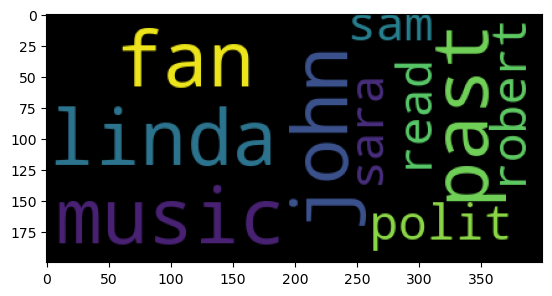


Cluster 2
alison current love natur use


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


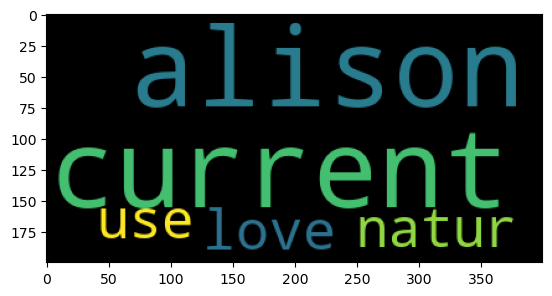


Cluster 3
like sport


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


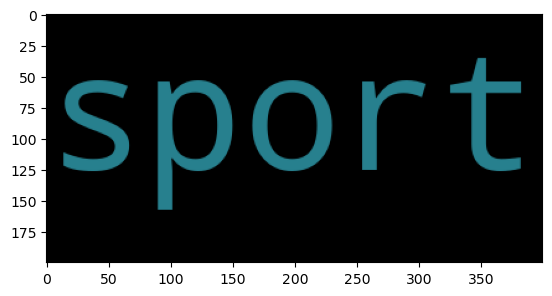


Cluster 4
book


/Users/jennysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


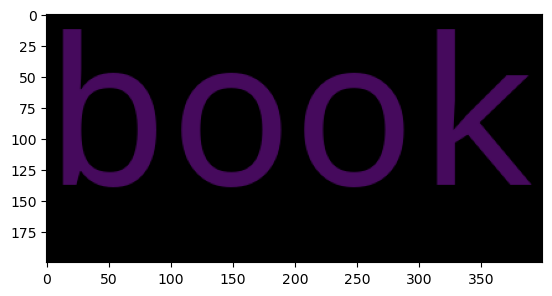

In [209]:
dp_t = dp.transpose()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dp_t)
cluster_labels = kmeans.predict(dp_t)
wc = WordCloud()

print(cluster_labels)
print(dp.columns.tolist())

for cluster in range(4):
    print("\nCluster " + str(cluster + 1))
    words=[]
    for i in range(len(cluster_labels)):
        if (cluster_labels[i] == cluster):
            words.append(v.get_feature_names()[i])
    print(' '.join(words))
    wc.generate(' '.join(words))
    plt.imshow(wc)
    plt.show()

In [210]:
#Word2Vec
from gensim.models import Word2Vec
new_corpus = [sentence for sentence in corpus]
model = Word2Vec(sentences=corpus, min_count=1)
model.train(corpus, total_examples=len(corpus), epochs=5)


vectors = [model.wv[word] for word in model.wv.index_to_key]

print("Word2Vec document-term matrix:")
print("=====================================")
print(vectors)

Word2Vec document-term matrix:
[array([-2.36916402e-03,  1.93653908e-03,  6.41074497e-03,  1.06454790e-02,
       -9.33784992e-03, -9.35601909e-03,  8.08042567e-03,  1.33533981e-02,
       -7.91075919e-03, -7.00681936e-03,  9.15360823e-03, -4.26336518e-03,
       -4.69608512e-03,  6.81672944e-03, -3.79769877e-03, -1.91505160e-03,
        5.09477220e-03,  1.16712623e-03, -1.03655262e-02, -1.44758290e-02,
        7.64505938e-03,  5.68334991e-03,  1.09888436e-02,  1.00281228e-04,
        5.68454247e-03, -2.56856601e-03, -2.26125005e-03,  7.06877466e-03,
       -8.65994114e-03, -3.25286970e-03, -5.79650467e-03, -3.11302440e-03,
        1.10465335e-02, -8.01302865e-03, -3.34555772e-03,  7.78708083e-04,
        1.02380579e-02, -5.64023480e-03, -1.33163389e-03, -4.87735868e-03,
       -7.91360438e-03,  4.50220844e-03, -1.16370441e-02, -2.54911347e-03,
        7.46694801e-04, -4.12725931e-04, -9.29199532e-03,  9.13489517e-03,
        5.38338535e-03,  1.04231080e-02, -8.13506171e-03,  2.4554817

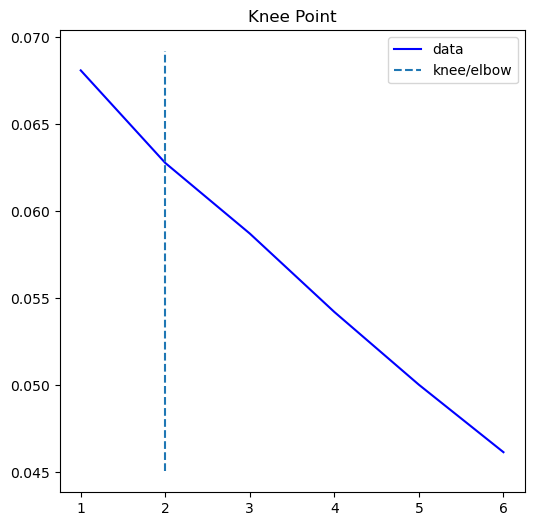

In [211]:
sse = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(vectors)
    sse.append(kmeans.inertia_)

k1 = KneeLocator(range(1,7), sse, curve='convex', direction='decreasing', S=0.0)
k1.plot_knee()

['sam', 'like', 'polit', 'fan', 'music', 'robert', 'love', 'book', 'natur', 'read', 'linda', 'like', 'book', 'sport', 'like', 'alison', 'use', 'love', 'natur', 'current', 'like', 'natur']


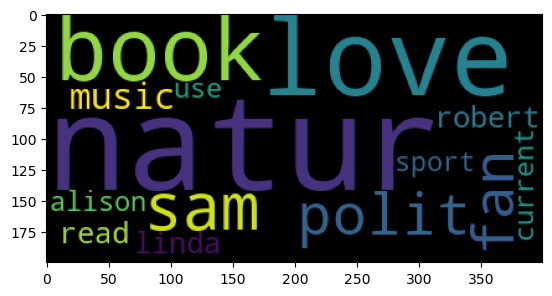

['past', 'john', 'like', 'sport', 'like', 'sport', 'sara', 'like', 'book', 'polit', 'past', 'read']


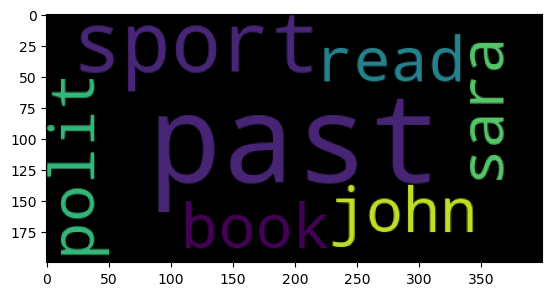

In [212]:
kmeans = KMeans(n_clusters=2, random_state=0)
predictions = kmeans.fit_predict(vectors)

for cluster in range(2):
    words = []
    for i in range(len(corpus)):
        if (predictions[i] == cluster):
            word = ""
            for letter in corpus[i]:
                if (letter == " "):
                    words.append(word)
                    word = ""
                else:
                    word += letter
    print(words)
    
    wc.generate(' '.join(words))
    plt.imshow(wc)
    plt.show()